In [3]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import scipy.stats
from scipy.signal import savgol_filter

In [4]:
#Func to convert index n to l,m
def ntolm(n):
    lt = (np.sqrt(8.0*n+1)-1.0)/2.0
    l = int(lt)
    m = int(n-l*(l+1)/2)
    return l,m

In [5]:
weights = np.loadtxt("/home/vaishali/Desktop/weights_EB_smica_R3.00.txt")  #weights gotten from Smica propagation code
e_weights = np.ndarray(shape=(7,4001))
e_weights = weights[:7,:]                       # first 7 columns taken to be e weights


Plotting e weights for the 7 frequency channels

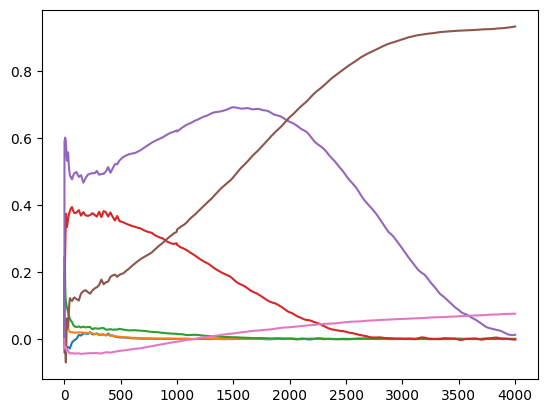

In [6]:
el = np.ndarray(shape=(4001))
for i in range(4001):
    el[i] = i
for i in range(7):    
    plt.plot(el,e_weights[i,:])


Getting the elm_nu for the seven frequency channels

In [7]:
npix = 12*2048*2048
mapt=np.ndarray(shape=(7,npix))
mapq=np.ndarray(shape=(7,npix))
mapu=np.ndarray(shape=(7,npix))

In [8]:
mapq[0] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_030-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=1),nside_out=2048)
mapq[1] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_044-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=1),nside_out=2048)
mapq[2] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_070-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=1),nside_out=2048)
mapq[3] = hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits',field=1)
mapq[4] = hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits',field=1)
mapq[5] = hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits',field=1)
mapq[6] =  hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits',field=1)

In [9]:
mapu[0] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_030-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=2),nside_out=2048)
mapu[1] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_044-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=2),nside_out=2048)
mapu[2] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_070-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=2),nside_out=2048)
mapu[3] = hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits',field=2)
mapu[4] = hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits',field=2)
mapu[5] = hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits',field=2)
mapu[6] = hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits',field=2)


In [10]:
mapt[0] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_030-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=0),nside_out=2048)
mapt[1] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_044-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=0),nside_out=2048)
mapt[2] = hp.ud_grade(hp.fitsfunc.read_map('/home/vaishali/Downloads/LFI_SkyMap_070-BPassCorrected-field-IQU_1024_R3.00_full.fits',field=0),nside_out=2048)
mapt[3] = hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_100-field-IQU_2048_R3.00_full.fits',field=0)
mapt[4] = hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_143-field-IQU_2048_R3.00_full.fits',field=0)
mapt[5] = hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_217-field-IQU_2048_R3.00_full.fits',field=0)
mapt[6] = hp.fitsfunc.read_map('/home/vaishali/Downloads/HFI_SkyMap_353-psb-field-IQU_2048_R3.00_full.fits',field=0)

In [55]:
mask2 = hp.fitsfunc.read_map('/home/vaishali/Downloads/COM_Mask_CMB-Inpainting-Mask-Pol_2048_R3.00.fits')

In [58]:
mask = hp.read_map("/home/vaishali/Desktop/transition_mask.fits.gz")
mask1 = np.loadtxt('/home/vaishali/Desktop/mask_smica_plus_Galplane_nside2048_fsky40p05.dat')
print(mask.shape)
npix = mask.shape[0]
nside = hp.npix2nside(npix)
print(nside)

(50331648,)
2048


In [59]:
fsky = np.count_nonzero(mask == 1)/(len(mask))
print(fsky)
fsky1 = np.count_nonzero(mask1 == 1)/(len(mask))
print(fsky1)
fsky2 = np.count_nonzero(mask2 == 1)/(len(mask))
print(fsky2)

0.5957929094632467
0.4005134105682373
0.7814398805300394


In [60]:
lmax=2048
n_alms=int(0.5*(lmax+1)*(lmax+2))
maps = np.ndarray(shape=(3,npix))
elms = np.ndarray(shape=(7,n_alms))
elms1 = np.ndarray(shape=(7,n_alms))
elms2 = np.ndarray(shape=(7,n_alms))
for i in range(7):
    maps[0,:]=mapt[i]
    maps[1,:]=mapq[i]
    maps[2,:]=mapu[i]
    elms[i] = hp.map2alm(maps*mask,pol=True,lmax=2048)[1]
    elms1[i] = hp.map2alm(maps*mask1,pol=True,lmax=2048)[1]
    elms2[i] = hp.map2alm(maps*mask2,pol=True,lmax=2048)[1]
    
    

/tmp/ipykernel_31801/1578792918.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  elms[i] = hp.map2alm(maps*mask,pol=True,lmax=2048)[1]
/tmp/ipykernel_31801/1578792918.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  elms1[i] = hp.map2alm(maps*mask1,pol=True,lmax=2048)[1]
/tmp/ipykernel_31801/1578792918.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  elms2[i] = hp.map2alm(maps*mask2,pol=True,lmax=2048)[1]


Obtaining elm_smica for different masks

In [61]:
elm_smica = np.zeros(shape=(n_alms))
elm_smica1 = np.zeros(shape=(n_alms))
elm_smica2 = np.zeros(shape=(n_alms))
for j in range(n_alms):
    l,m = ntolm(j)
    if l>150:
        for k in range(7):
            elm_smica[j] = elm_smica[j] + e_weights[k,l]*elms[k,j]
            elm_smica1[j] = elm_smica1[j] + e_weights[k,l]*elms1[k,j]
            elm_smica2[j] = elm_smica2[j] + e_weights[k,l]*elms2[k,j]

In [62]:
nu0=57
bnupol = np.ndarray(shape=(7))
nu = np.array([30,44,70,100,143,217,353])
bnupol = (nu/(nu0*np.tanh(nu/(2*nu0)))) - 1

Obtaining blm_smica for different masks

In [63]:
blm_pol = np.zeros(shape=(n_alms))
blm_pol1 = np.zeros(shape=(n_alms))
blm_pol2 = np.zeros(shape=(n_alms))
for i in range(n_alms):
    l,m = ntolm(i)
    if l>150:
        for v in range(6):
            blm_pol[i] = blm_pol[i] + (bnupol[v]*e_weights[v,l]*elms[v,i]/elm_smica[i])
            blm_pol1[i] = blm_pol1[i] + (bnupol[v]*e_weights[v,l]*elms1[v,i]/elm_smica1[i])
            blm_pol2[i] = blm_pol2[i] + (bnupol[v]*e_weights[v,l]*elms2[v,i]/elm_smica2[i])
            

Smoothening blm_smica using savitzky-Golay filter and to get the mode:b_l (This is for fsky = 59%)

In [66]:
temp = np.zeros(shape=(lmax+1))
temp1 = np.zeros(shape=(lmax+1))
temp2 = np.zeros(shape=(lmax+1))
bins = [[] for _ in range(lmax+1)]
bins1 = [[] for _ in range(lmax+1)]
bins2 = [[] for _ in range(lmax+1)]
for j in range(n_alms):
    l,m = ntolm(j)
    if l>150: 
         bins[l].append(blm_pol[j])
         bins1[l].append(blm_pol1[j])
         bins2[l].append(blm_pol1[j])
         if m!=0:                       #taking m<0 values of blm
             bins[l].append(blm_pol[j]) 
             bins1[l].append(blm_pol1[j]) 
             bins2[l].append(blm_pol1[j])

for l in range(lmax+1):
    if l>150:    
        hist, bin_edges = np.histogram(bins[l], bins='auto', density=True)
        hist1, bin_edges1 = np.histogram(bins1[l], bins='auto', density=True)
        hist2, bin_edges2 = np.histogram(bins2[l], bins='auto', density=True)
# Smooth the histogram using Savitzky-Golay filter
        smooth_hist = savgol_filter(hist, window_length=5, polyorder=4)
        smooth_hist1 = savgol_filter(hist1, window_length=5, polyorder=4)
        smooth_hist2 = savgol_filter(hist2, window_length=5, polyorder=4)
# Find the mode
        mode_bin = np.argmax(smooth_hist)
        mode_bin1 = np.argmax(smooth_hist1)
        mode_bin2 = np.argmax(smooth_hist2)
        temp[l] = (bin_edges[mode_bin] + bin_edges[mode_bin + 1]) / 2
        temp1[l] = (bin_edges1[mode_bin1] + bin_edges1[mode_bin1 + 1]) / 2
        temp2[l] = (bin_edges2[mode_bin2] + bin_edges2[mode_bin2 + 1]) / 2
print(temp[501])    


1.7230852418665457


In [67]:
el = np.ndarray(shape=(lmax+1))
for i in range(0,2049):
    el[i] = int(i)

In [69]:
data = np.ndarray(shape=(2049,2))
data[:,0] = el
data[:,1] = temp

In [ ]:
np.savetxt('b_l_pol.dat',data)

b_l smica for different masks(fsky = 40.1%, 59.1% and 72.2%) for polarization data 

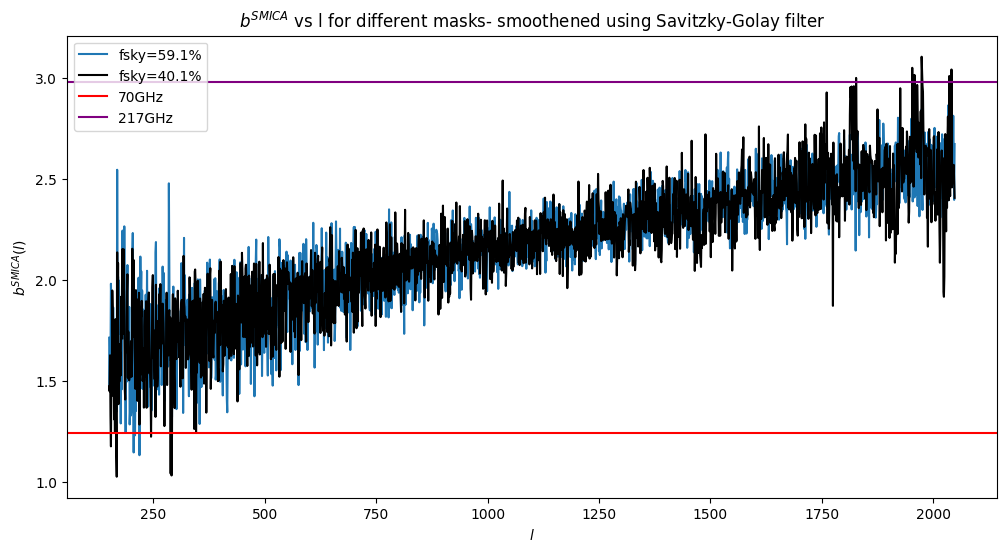

In [76]:
plt.figure(figsize=(12,6))
plt.plot(el[151:],temp[151:],label='fsky=59.1%')
#plt.plot(el[151:],temp2[151:],label='fsky=78.1%')
plt.plot(el[151:],temp1[151:],color='black',label='fsky=40.1%')
plt.xlabel('${l}$')
plt.ylabel('$b^{SMICA}(l)$')
plt.axhline(y=bnupol[2],color='red',label='70GHz')
plt.axhline(y=bnupol[5],color='purple',label='217GHz')
plt.title('$b^{SMICA}$ vs l for different masks- smoothened using Savitzky-Golay filter')
plt.legend()
